In [6]:
#please run twice
try:
    import dolfinx
except ImportError:
    !wget "https://github.com/fem-on-colab/fem-on-colab.github.io/raw/9b21f39/releases/fenicsx-install-real.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh"
    import dolfinx

In [7]:
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq
import pyvista
pyvista.global_theme.jupyter_backend = 'static'
pyvista.global_theme.notebook = True



In [ ]:
import numpy as np
from petsc4py import PETSc
assert not np.issubdtype(PETSc.ScalarType, np.complexfloating)

In [ ]:
try:
    import google.colab  # noqa: F401
except ImportError:
    import gmsh
else:
    try:
        import gmsh
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
        import gmsh

--2023-05-29 13:31:33--  https://fem-on-colab.github.io/releases/gmsh-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.111.153, 185.199.109.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3495 (3.4K) [application/x-sh]
Saving to: ‘/tmp/gmsh-install.sh’

/tmp/gmsh-install.s 100%[===================>]   3.41K  --.-KB/s    in 0s      

2023-05-29 13:31:33 (27.4 MB/s) - ‘/tmp/gmsh-install.sh’ saved [3495/3495]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ GMSH_INSTALLED=/usr/local/share/fem-on-colab/gmsh.installed
+ [[ ! -f /usr/local/share/fem-on-colab/gmsh.installed ]]
+ H5PY_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/771c87a/releases/h5py-install.sh
+ [[ https://githu

In [8]:

!pip install meshio

import gmsh
import numpy as np
import pyvista
from dolfinx.fem import (Constant, dirichletbc, Function, FunctionSpace, assemble_scalar,
                         form, locate_dofs_geometrical, locate_dofs_topological)
from dolfinx.fem.petsc import LinearProblem
from dolfinx.io import XDMFFile
from dolfinx.mesh import create_unit_square, locate_entities
from dolfinx.plot import create_vtk_mesh
#from dolfinx.io import meshio
import meshio
from ufl import (SpatialCoordinate, TestFunction, TrialFunction,
                 dx, grad, inner)

from mpi4py import MPI
from petsc4py.PETSc import ScalarType
pyvista.start_xvfb()




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Warning: Unknown entry data. Ignoring.

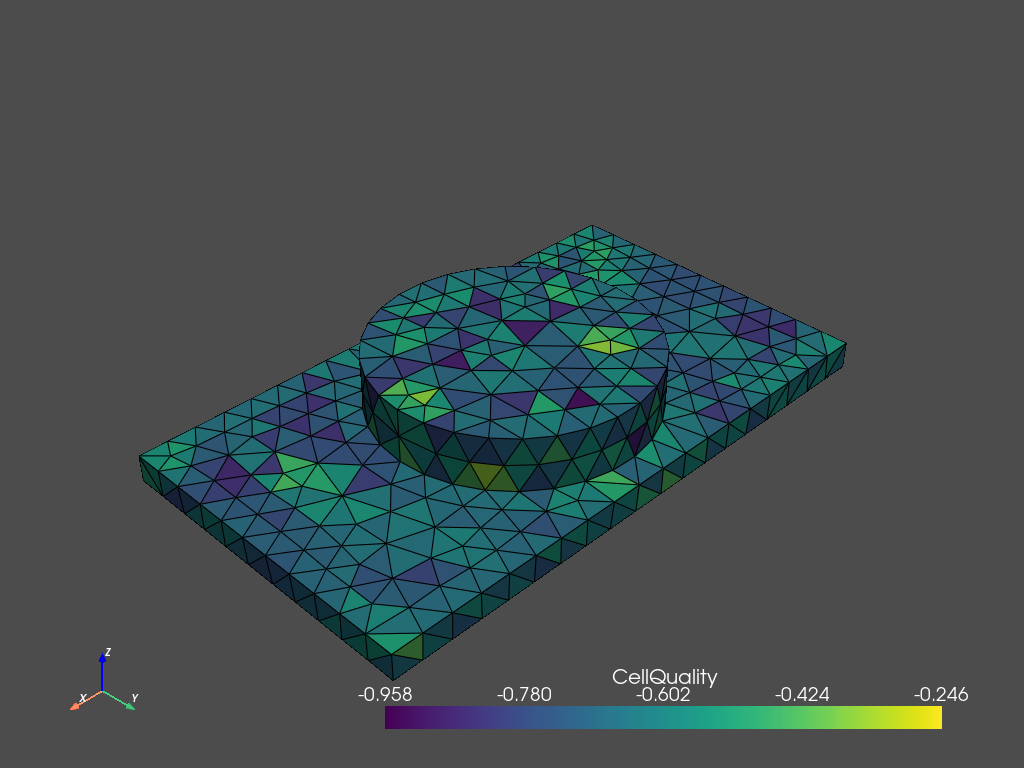

In [9]:
variable=pyvista.read('meshFreeCAD.xml')
variable_2= variable.compute_cell_quality()
variable_2.plot(show_edges=True,cpos='iso')